In [1]:
from mmseg.apis import init_segmentor, inference_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette
import cv2

/home/zhangzr/anaconda3/envs/mmseg-kaggle/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
config_file = '../cache/upernet_convnext_base_fp16_256x256_16k_kaggle_no_crop/upernet_convnext_base_fp16_256x256_16k_kaggle_no_crop.py'
checkpoint_file = '../cache/upernet_convnext_base_fp16_256x256_16k_kaggle_no_crop/iter_8000.pth'

In [3]:
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

/home/zhangzr/mmsegmentation_kaggle/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


load checkpoint from local path: ../cache/upernet_convnext_base_fp16_256x256_16k_kaggle_no_crop/iter_8000.pth


In [4]:
# test a single image
img = '../data/kaggle_segmentation_clean_data/train/case149_day12_slice_0088.png'
result = inference_segmentor(model, img)

/home/zhangzr/mmsegmentation_kaggle/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


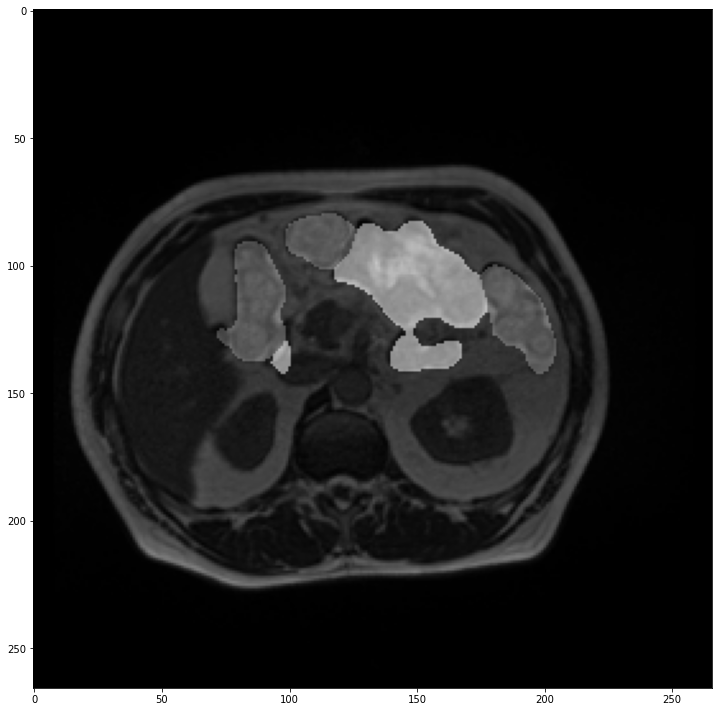

pred [0 1 2]


In [5]:
# show the results
import numpy as np
processed_img = cv2.imread(img, cv2.IMREAD_UNCHANGED) 
processed_img = processed_img.astype('float32') # original is uint16
processed_img = (processed_img - processed_img.min())/(processed_img.max() - processed_img.min())*255.0 # scale image to [0, 255]
processed_img = processed_img.astype('uint8')
processed_img = np.stack([processed_img for _ in range(3)], -1)
show_result_pyplot(model, processed_img, result, get_palette(dataset='kaggle'))
print('pred', np.unique(result[0]))

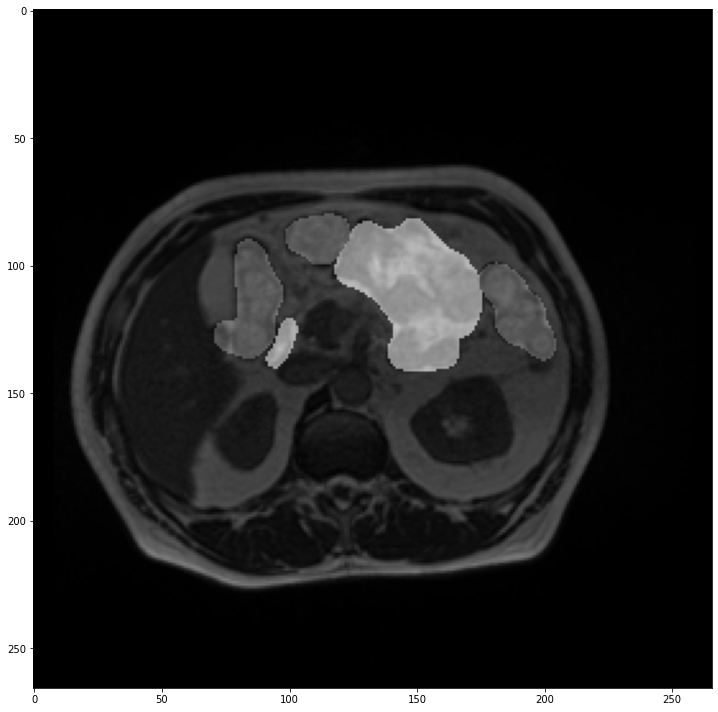

gt [0 1 2]


In [6]:
# show gt
gt_file = '../data/kaggle_segmentation_clean_data/label/case149_day12_slice_0088.png'
gt = [cv2.imread(gt_file, cv2.IMREAD_UNCHANGED)]
show_result_pyplot(model, processed_img, gt, get_palette(dataset='kaggle'))
print('gt', np.unique(gt[0]))